<a href="https://colab.research.google.com/github/peenalGupta/Data-Analytics-3-Labs/blob/main/08_Animal_Classification_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Animal Classification

In [ ]:
# TODO: Download datasets

!wget https://storage.googleapis.com/adsa-data/animal-classification/animal.zip
!unzip animal.zip -d temp

In [2]:
!mkdir -p data/dog
!mkdir -p data/cat
!cp temp/train/dog.* data/dog/
!cp temp/train/cat.* data/cat/

In [3]:

import os

dog_count = len(os.listdir("./data/dog"))
cat_count = len(os.listdir("./data/cat"))
print("Dog pictures: ", dog_count)
print("Cat pictures: ", cat_count)

Dog pictures:  12500
Cat pictures:  12500


## Data Preparation

In [6]:
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
batch_size=32

In [7]:
# TODO: Split and load datasets

import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

# TODO Use tf.keras.utils.image_dataset_from_directory to assign 80% images to the train dataset
dir = './data'

train_ds = tf.keras.utils.image_dataset_from_directory(
    dir,
    labels='inferred',
    label_mode='binary',
    image_size=IMAGE_SIZE,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

Found 25000 files belonging to 2 classes.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    dir,
    labels='inferred',
    label_mode='binary',
    image_size=IMAGE_SIZE,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

Found 25000 files belonging to 2 classes.


In [9]:

class_names = train_ds.class_names
print(class_names)

['cat', 'dog']


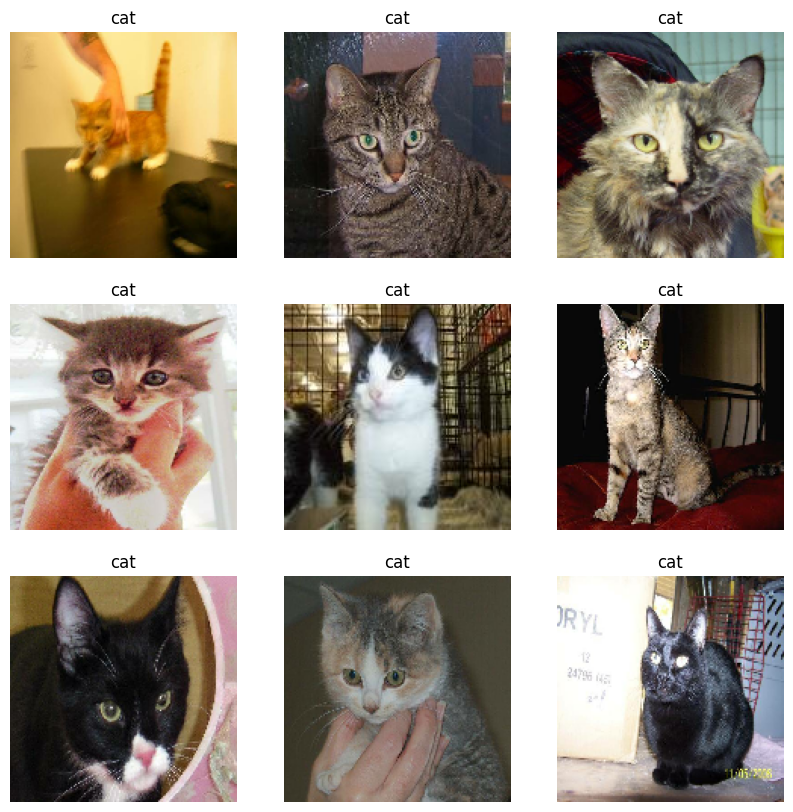

In [10]:
# TODO: Plot some images along with their labels

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    label_index = int(labels[i])
    plt.title(class_names[label_index])
    plt.axis("off")

In [11]:
# TODO: Set cache for datasets

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Model Preparation

In [12]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.models.Sequential()

# TODO: Load EfficientNetB7 model with pretrained weights
# but without the fully-connected layer at the top.
# We want to add our own FC layers and outputs
base = keras.applications.EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)
)
model.add(base)

# TODO: Add a GlobalAveragePooling2D layer
model.add(keras.layers.GlobalAveragePooling2D())

# TODO: Add a Dropout layer
model.add(keras.layers.Dropout(0.2))

# TODO: Add outputs
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Allow model's weights to be updated
model.trainable = True

# TODO: Freeze base layers (Don't allow weights of the base to be updated)
base.trainable = False

for layer in model.layers:
    print(layer.name, ' ', layer.trainable)

# TODO: Add the loss function based on your outputs
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model.summary()

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
efficientnetb7   False
global_average_pooling2d   True
dropout   True
dense   True


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb7 (Functional)          │ (None, 5, 5, 2560)          │      64,097,687 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2560)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2560)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,561 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,100,248 (244.52 MB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 64,097,687 (244.51 MB)

## Training

In [13]:
# TODO: Train model for 1 epoch
epochs = 1
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
)

 66/782 ━━━━━━━━━━━━━━━━━━━━ 1:25:54 7s/step - accuracy: 0.8601 - loss: 0.4062

KeyboardInterrupt: 

## Testing

In [ ]:
# TODO: Load test set

!wget https://storage.googleapis.com/adsa-data/animal-classification/test.zip
!unzip test.zip


dog: 98.87%


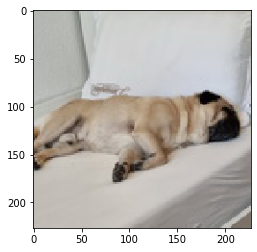

In [ ]:
# TODO: Retry again with downloaded images
...